1. Getting data ready
2. Building Model
3. Fitting the model
4. Making predictions and evaluating a model(inference)
5. Saving and loading a model
6. Putting it all together 

In [2]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

- Split data into training and test sets

In [4]:
len(X), len(y)

(50, 50)

In [6]:
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Lets visualize it 

In [14]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                    predictions = None):
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', marker='o',label = 'Training data')
    
    # Plot test data in red
    plt.scatter(test_data, test_labels, c = 'r', marker='x', label = 'Testing data')
    
    if predictions is not None:
        # Plot the predictions in green
        plt.scatter(test_data, predictions, c='g', marker='o', label = 'Predictions')
    
    # Show the legend
    plt.legend(prop={'size': 14})

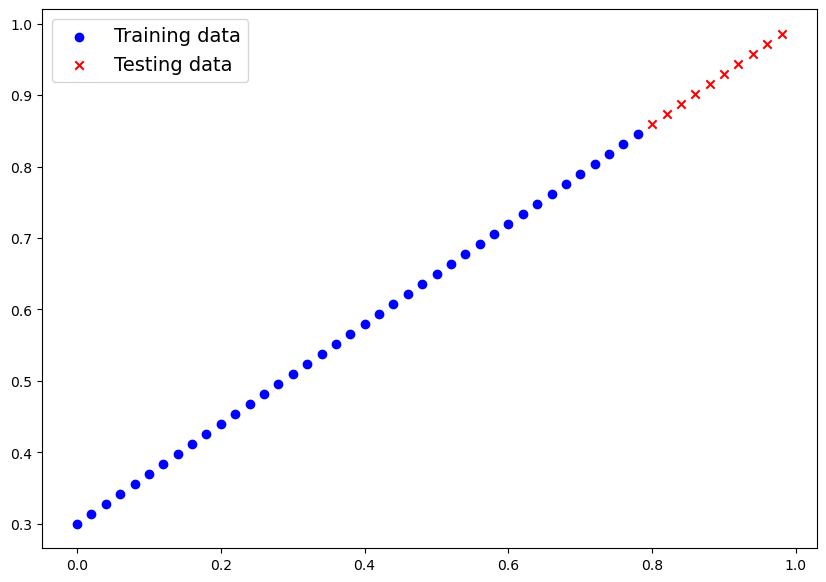

In [15]:
plot_predictions()

2. Build a model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.foloat),requires_grad=True)
        
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias